In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 0
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for Box-Cox Transformation if I do it
#from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling



df3 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only_3prime.txt", delimiter = '\t')#, nrows=2)
df5 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only.txt", delimiter = '\t')#, nrows=2)


In [30]:
#pip install mlxtend


In [31]:
dfclean5 = df5.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean5 = dfclean5[~dfclean5.index.isin(range(33482, 33797))] #122
dfclean5 = dfclean5[~dfclean5.index.isin(range(34747, 35652))] #126, 127, 128
dfclean5 = dfclean5[~dfclean5.index.isin(range(35930, 36501))] #130, 131
dfclean5 = dfclean5[~dfclean5.index.isin(range(36770, 37054))] #133
dfclean5 = dfclean5[~dfclean5.index.isin(range(38773, 39015))] #140
dfclean5 = dfclean5[~dfclean5.index.isin(range(39325, 39543))] #142
dfclean5 = dfclean5[~dfclean5.index.isin(range(40030, 40626))] #145, 146
dfclean5 = dfclean5[~dfclean5.index.isin(range(46853, 49718))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean5 = dfclean5[~(dfclean5.index >= 115849)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

# Print the entire dataframe
#print(dfclean5)
#dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean5.xlsx', index=False)

In [32]:
dfclean5_adjustedto_m = dfclean5
numeric_columns = dfclean5_adjustedto_m.select_dtypes(include=[np.number]).columns

# Calculate z-scores and adjust outliers to the mean
numeric_columns = dfclean5_adjustedto_m.select_dtypes(include=[np.number]).columns

# Adjust outliers to the mean
for col in numeric_columns:
    mean = dfclean5_adjustedto_m[col].mean()
    std = dfclean5_adjustedto_m[col].std()
    z_scores = (dfclean5_adjustedto_m[col] - mean) / std
    
    # Replace outliers (threshold: 3 standard deviations from the mean) with the mean
    outlier_threshold = 20.0
    dfclean5_adjustedto_m[col] = np.where(np.abs(z_scores) > outlier_threshold, mean, dfclean5_adjustedto_m[col])
    dfclean5_adjustedto_m[col] =  dfclean5_adjustedto_m[col].astype(int)
#print(dfclean3_adjustedto_m)

In [35]:
dfclean5_scaled = dfclean5
dfclean5adj_scaled = dfclean5_adjustedto_m
columns_to_standardize = ['C15', 'C25', 'D15', 'D25', 'R15', 'R25']
dfclean5_scaled[columns_to_standardize] = scaler.fit_transform(dfclean5[columns_to_standardize])
dfclean5adj_scaled[columns_to_standardize] = scaler.fit_transform(dfclean5_adjustedto_m[columns_to_standardize])


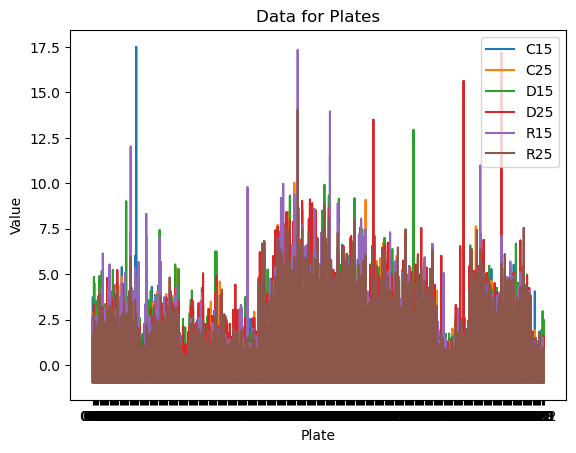

In [39]:
#one big plot


# Remove the "astype(int)" function call
dfclean5_scaled['plates'] = dfclean5_scaled['plate'].str.extract('(\d+)')

plates = dfclean5_scaled['plates']
c15 = dfclean5_scaled['C15']
c25 = dfclean5_scaled['C25']
d15 = dfclean5_scaled['D15']
d25 = dfclean5_scaled['D25']
r15 = dfclean5_scaled['R15']
r25 = dfclean5_scaled['R25']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c15, label='C15')
ax.plot(plates, c25, label='C25')
ax.plot(plates, d15, label='D15')
ax.plot(plates, d25, label='D25')
ax.plot(plates, r15, label='R15')
ax.plot(plates, r25, label='R25')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

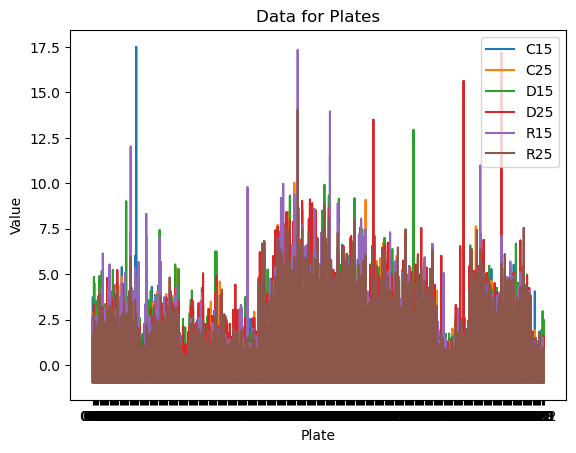

In [40]:
#one big plot


# Remove the "astype(int)" function call
dfclean5adj_scaled['plates'] = dfclean5adj_scaled['plate'].str.extract('(\d+)')

plates = dfclean5adj_scaled['plates']
c15 = dfclean5adj_scaled['C15']
c25 = dfclean5adj_scaled['C25']
d15 = dfclean5adj_scaled['D15']
d25 = dfclean5adj_scaled['D25']
r15 = dfclean5adj_scaled['R15']
r25 = dfclean5adj_scaled['R25']

# Create the plot
fig, ax = plt.subplots()
ax.plot(plates, c15, label='C15')
ax.plot(plates, c25, label='C25')
ax.plot(plates, d15, label='D15')
ax.plot(plates, d25, label='D25')
ax.plot(plates, r15, label='R15')
ax.plot(plates, r25, label='R25')

# Set the title and axis labels
ax.set_title('Data for Plates')
ax.set_xlabel('Plate')
ax.set_ylabel('Value')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [1]:
dfclean5_scaled['plates'] = dfclean5_scaled['plate'].str.extract(r'(\d+)').astype(int)
dfgroups = {}
for pattern, group in dfclean5_scaled.groupby('plates'):
    dfgroups[pattern] = group
    print( group.columns)
    


NameError: name 'dfclean5_scaled' is not defined

In [2]:
for key, df in dfgroups.items():
    plt.figure(figsize=(25, 6))
    plt.scatter(df.index, df['R15'].astype(int), label='R15')  
    plt.scatter(df.index, df['C15'].astype(int), label='C15')  
    plt.scatter(df.index, df['C25'].astype(int), label='C25')  

    plt.xlabel('Index')  # Assuming 'well' is not a numeric column, otherwise, replace with 'well'
    plt.ylabel('Data')
    plt.title(f'Plot for plate {key}')
    plt.legend()
    plt.show()

NameError: name 'dfgroups' is not defined

# Drop Rdiff >0

In [3]:
droppedR_df = dfclean5_scaled.copy()
droppedR_df['R_diff'] =droppedR_df['R15']-droppedR_df['R25']


droppedR_df = droppedR_df[droppedR_df['R_diff'] <1]
droppedR_df = droppedR_df[droppedR_df['R_diff'] >-1]
print( droppedR_df)

NameError: name 'dfclean5_scaled' is not defined

In [4]:
droppedR_dfgroups = {}
for pattern, group in droppedR_df.groupby('plates'):
    droppedR_dfgroups[pattern] = group
    print( group.columns)

NameError: name 'droppedR_df' is not defined

In [5]:
for key, df in droppedR_dfgroups.items():
    plt.figure(figsize=(25, 6))
    plt.scatter(df.index, df['R_diff'].astype(int), label='R diff')  
    plt.scatter(df.index, df['C15'].astype(int), label='C15')  
    plt.scatter(df.index, df['C25'].astype(int), label='C25')  

    plt.xlabel('Index')  # Assuming 'well' is not a numeric column, otherwise, replace with 'well'
    plt.ylabel('Data')
    plt.title(f'Plot for plate {key}')
    plt.legend()
    plt.show()

In [47]:
dfclean5_scaled['ratio RR'] =dfclean5_scaled['R15']//dfclean5_scaled['R25']
dfclean5_scaled['ratio C1R1'] =dfclean5_scaled['C15']//dfclean5_scaled['R15']
dfclean5_scaled['ratio C1R2'] =dfclean5_scaled['C15']//dfclean5_scaled['R25']
dfclean5_scaled['ratio C2R1'] =dfclean5_scaled['C25']//dfclean5_scaled['R15']
dfclean5_scaled['ratio C2R2'] =dfclean5_scaled['C25']//dfclean5_scaled['R25']
dfclean5_scaled['plates'] = dfclean5_scaled['plate'].str.extract(r'(\d+)').astype(int)
dfclean5_scaled = dfclean5_scaled.replace([np.inf, -np.inf], 0).dropna()


In [6]:
dfgroups = {}
for pattern, group in dfclean5_scaled.groupby('plates'):
    dfgroups[pattern] = group
    print( group.columns)

NameError: name 'dfclean5_scaled' is not defined

In [7]:
for key, df in dfgroups.items():
    plt.figure(figsize=(25, 6))
    #plt.scatter(df.index, df['ratio RR'].astype(int), label='ratio RR')  
    plt.scatter(df.index, df['ratio C1R1'].astype(int), label='ratio C1R1')  
    plt.scatter(df.index, df['ratio C2R1'].astype(int), label='ratio C2R1')  
    #plt.scatter(df.index, df['C15Difference'].astype(int), label='Dif. to R15')  # Convert to int and plot 'C25' column

    
    plt.xlabel('Index')  # Assuming 'well' is not a numeric column, otherwise, replace with 'well'
    plt.ylabel('Data')
    plt.title(f'Plot for plate {key}')
    plt.legend()
    plt.show()